# Problem Description

Customer churn is a major problem for businesses in an environment where competitors are constantly endeavoring to retain their client base as well as wooing the business of new clients. Churn or attrition occurs when customers start viewing a competing company more favorably  and cease to do business with their present company. It is often said that, depending on the type of industry, acquiring a new customer is anywhere from five to 25 times more expensive than retaining an existing one. Therefore it makes sense for businesses of all kinds to understand their customers' behaviours using data and take appropriate actions in the face of emerging patterns heralding the departure of a body of valuable customers.

In this project, we are going to predict customer churn using the <a href="https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv", target="_blank">Telecom Dataset</a> downloaded from the "Guide to Sample Data Sets" page hosted by IBM. Telecommunications is an industry in which subscribers have multiple competing businesses to choose from over their current company. The analysis will be done using Logistic Regression, Decision Tree, and Random Forest. So let’s get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *
from collections import OrderedDict

/home/drkhurram/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Getting to Know the Data
So let's go ahead and have a look at our dataset and get to know what each column represents. Each row represents a customer while each column contains data about a particular attribute of the customer.

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Let's quickly write a function to get info about the columns we want. We should be able to pass a dataset alongwith either a list_of_column_labels_or_indices or a range_of_columns.

In [4]:
def col_info(data=df, col_ids=None):
    '''
    The function takes a dataset and a list of columns supplied by the user. If only a dataset is passed, the function will default to providing info on all the columns. The columns are specified as either all "labels" or all indices and can be in any desired order. Column indices can be passed using either a range function (for a contiguous list of columns) or a simple list (for non-contiguous columns). If "labels" are specified, these are converted into indices by the function before use.\
    \n\nEXAMPLES: Suppose the dataset has 10 columns labeled "A" to "J". \n\nSo for all columns use:
    col_info(range(0, df.shape[1]))\n\nFor the first 6 columns use:
    col_info(range(0, 5))\n\nFor columns 1, 3, 7, and 8 use:
    col_info([1, 3, 7, 8])\n\nFor columns "A", "D" and "F" use:
    col_info(["A", "D", "F"])
    '''
    if col_ids is None:
        col_ids = range(0, data.shape[1])
    # if the list contains column names (strings) instead of indices:
    # check the 1st element only as all elements have the same type
    if type(col_ids[0]) == str:
        col_indices = [] # col_indices is the new list
        for col in col_ids: # for each column in the passed list
            index = data.columns.get_loc(col) # get column index
            col_indices.append(index) # append column index to list
    else: # if the list contains column indices
        col_indices = col_ids
    print("The full dataset contains:", data.shape[0], "rows and", \
          data.shape[1], "columns. Details for the requested columns", \
          "are as follows:\n")    
    for col in col_indices: # for each index in the new list
        print(data.columns[col], ": ", data.iloc[:,col].dtype, \
              data.iloc[:,col].unique(), ":", \
              len(data.iloc[:,col].unique()), "levels")

In [5]:
col_info(df)

The full dataset contains: 7043 rows and 21 columns. Details for the requested columns are as follows:

customerID :  object ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] : 7043 levels
gender :  object ['Female' 'Male'] : 2 levels
SeniorCitizen :  int64 [0 1] : 2 levels
Partner :  object ['Yes' 'No'] : 2 levels
Dependents :  object ['No' 'Yes'] : 2 levels
tenure :  int64 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] : 73 levels
PhoneService :  object ['No' 'Yes'] : 2 levels
MultipleLines :  object ['No phone service' 'No' 'Yes'] : 3 levels
InternetService :  object ['DSL' 'Fiber optic' 'No'] : 3 levels
OnlineSecurity :  object ['No' 'Yes' 'No internet service'] : 3 levels
OnlineBackup :  object ['Yes' 'No' 'No internet service'] : 3 levels
DeviceProtection :  object ['No' 

The raw data contains 7043 rows (customers) and 21 columns (features). The “Churn” column is our target.

# Data Wrangling

First of all, let's rename the columns "customerID", "gender", and "tenure" to title case so that all column names are consistent.

In [6]:
df.rename(index=str, columns={"customerID": "CustomerID", \
                              "gender": "Gender", "tenure": "Tenure"\
                             }, inplace=True)

## <font color='brown'>Missing Values</font>

We've made an interesting discovery here!!! If we use df.isna().sum() on the raw data such that some columns have values inconsistent with their dtype, then df.isna().sum() doesn't show any missing values! Let's see what happens when we use df.isna().sum() on the raw data:

In [7]:
df.isna().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

You see, no missing values detected! Now we can see from column values that there are two columns namely MonthlyCharges and TotalCharges with float type values. However, the TotalCharges column is incorrectly stored as object type. So let's convert it to the correct type which is float and then use df.isna().sum() again.

In [8]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [9]:
df["TotalCharges"].dtype

dtype('float64')

Now let's use df.isna().sum() to check the number of missing values in each column.

In [10]:
df.isna().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We found that there are 11 missing values in the “TotalCharges” column! So the bottomline is that we should always convert data to the correct dtype before using df.isna().sum(). Otherwise, missing values in columns stored with the incorrect dtype may go undetected!

Let's find the indices of the rows with missing values for "TotalCharges".

In [11]:
pd.isnull(df).any(1).nonzero()[0]

array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754])

So now let’s go ahead and get the shape of the data before dropping missing values. We'll then remove all rows with missing values and confirm it by looking at the shape of the data again.

In [12]:
df.shape

(7043, 21)

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(7032, 21)

## <font color='brown'>Value Replacement</font>

Let's get the columns info once again to see which ones contain similar values.

In [15]:
col_info(df)

The full dataset contains: 7032 rows and 21 columns. Details for the requested columns are as follows:

CustomerID :  object ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] : 7032 levels
Gender :  object ['Female' 'Male'] : 2 levels
SeniorCitizen :  int64 [0 1] : 2 levels
Partner :  object ['Yes' 'No'] : 2 levels
Dependents :  object ['No' 'Yes'] : 2 levels
Tenure :  int64 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] : 72 levels
PhoneService :  object ['No' 'Yes'] : 2 levels
MultipleLines :  object ['No phone service' 'No' 'Yes'] : 3 levels
InternetService :  object ['DSL' 'Fiber optic' 'No'] : 3 levels
OnlineSecurity :  object ['No' 'Yes' 'No internet service'] : 3 levels
OnlineBackup :  object ['Yes' 'No' 'No internet service'] : 3 levels
DeviceProtection :  object ['No' 'Yes

<strong><font color='red'>1-</font></strong> For the column "MultipleLines", we can see that there is a value labeled 'No phone service' along with the 'No' and 'Yes' labels. That's because if the value of "PhoneService" for a customer (row) is 'No', we'll have the value 'No phone service' in the column "MultipleLines" for that customer. So basically, we can replace 'No phone service' with 'No' as they both mean the same for "MultipleLines".

In [16]:
df["MultipleLines"] = df["MultipleLines"].replace('No phone service', \
                                                  'No')

<strong><font color='red'>2-</font></strong> On a logic similar to <font color='red'>1</font>, we can replace the value 'No internet service' with 'No' for the six columns namely "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", and "StreamingMovies".

In [17]:
columns = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", \
           "TechSupport", "StreamingTV", "StreamingMovies"]
for col in columns:
    df[col] = df[col].replace('No internet service', 'No')

## <font color='brown'>Value Mapping and Discretization</font>

<strong><font color='red'>1-</font></strong> First of all, we'll map the integer values 0 and 1 in the column "SeniorCitizen" to 'No' and 'Yes' respectively.

In [18]:
mapping = {0: 'No', 1: 'Yes'}
df["SeniorCitizen"] = df["SeniorCitizen"].map(mapping)

<strong><font color='red'>2-</font></strong> Now let's check the minimum and maximum values of "tenure" column to see what could be a logical discretization of these values into categorical labels.

In [19]:
display(df["Tenure"].min(), df["Tenure"].max())

1

72

Since the minimum value for "Tenure" is 1 month and the maximum value is 72 months, we can create five groups for "Tenure": “0–12 Month”, “12–24 Month”, “24–48 Months”, “48–60 Month”, and “> 60 Month”.

In [20]:
def group_tenure(tenure):
    if ((tenure >= 0) & (tenure <= 12)):
        return('<= 1 Year')
    elif ((tenure > 12) & (tenure <= 24)):
        return('1-2 Years')
    elif ((tenure > 24) & (tenure <= 48)):
        return('2-4 Years')
    elif ((tenure > 48) & (tenure <= 60)):
        return('4-5 Years')
    elif tenure > 60:
        return('> 5 Years')

In [21]:
df.insert(20, "Tenure_Group", df["Tenure"].apply(group_tenure))

In [22]:
df[["Tenure", "Tenure_Group"]].head(15)

,Tenure,Tenure_Group
0,1,<= 1 Year
1,34,2-4 Years
2,2,<= 1 Year
3,45,2-4 Years
4,2,<= 1 Year
5,8,<= 1 Year
6,22,1-2 Years
7,10,<= 1 Year
8,28,2-4 Years
9,62,> 5 Years


In [23]:
col_info(df, ["Tenure", "Tenure_Group"])

The full dataset contains: 7032 rows and 22 columns. Details for the requested columns are as follows:

Tenure :  int64 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] : 72 levels
Tenure_Group :  object ['<= 1 Year' '2-4 Years' '1-2 Years' '> 5 Years' '4-5 Years'] : 5 levels


In [24]:
df.drop(["CustomerID", "Tenure"], axis=1, inplace=True)

In [25]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Tenure_Group,Churn
0,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,<= 1 Year,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,2-4 Years,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,<= 1 Year,Yes
3,Male,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,2-4 Years,No
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,<= 1 Year,Yes


# EDA and Data Visualization

## <font color='brown'>Check Correlation between Numeric Variables</font>

In [26]:
corr = df[["MonthlyCharges", "TotalCharges"]].corr()

In [27]:
corr

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651065
TotalCharges,0.651065,1.000000


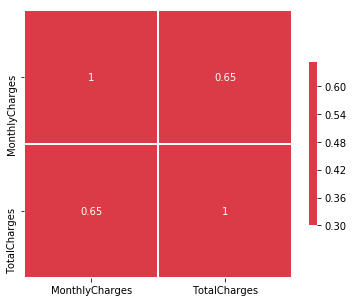

In [28]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The Monthly Charges and Total Charges are correlated. So one of them will be removed from the model. We remove Total Charges.

In [29]:
df.drop("TotalCharges", axis=1, inplace=True)

In [30]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Tenure_Group,Churn
0,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,<= 1 Year,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,2-4 Years,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,<= 1 Year,Yes
3,Male,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,2-4 Years,No
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,<= 1 Year,Yes


## <font color='brown'>Percentage Barplots to Assess the Distribution of Categorical Variables</font>

The default approach for creating barplots in seaborn for categorical columns is to use sns.countplot(). However this doesn't help us visualize the percentage of a category out of all the categories for a particular column. By contrast, the sns.barplot() method can make percentage barplots given a suitable lambda function, but only if a column is integer-valued. For this reason, we'll create a new copy of our dataset in which column values will be integers instead of labels. Later, we'll retrieve the original labels inside the plotting function from the mapping dictionary used to encode a particular a column.

### <font color='brown'>Value Encoding</font>

Let's reload the columns info to see the current state.

In [31]:
col_info(df)

The full dataset contains: 7032 rows and 19 columns. Details for the requested columns are as follows:

Gender :  object ['Female' 'Male'] : 2 levels
SeniorCitizen :  object ['No' 'Yes'] : 2 levels
Partner :  object ['Yes' 'No'] : 2 levels
Dependents :  object ['No' 'Yes'] : 2 levels
PhoneService :  object ['No' 'Yes'] : 2 levels
MultipleLines :  object ['No' 'Yes'] : 2 levels
InternetService :  object ['DSL' 'Fiber optic' 'No'] : 3 levels
OnlineSecurity :  object ['No' 'Yes'] : 2 levels
OnlineBackup :  object ['Yes' 'No'] : 2 levels
DeviceProtection :  object ['No' 'Yes'] : 2 levels
TechSupport :  object ['No' 'Yes'] : 2 levels
StreamingTV :  object ['No' 'Yes'] : 2 levels
StreamingMovies :  object ['No' 'Yes'] : 2 levels
Contract :  object ['Month-to-month' 'One year' 'Two year'] : 3 levels
PaperlessBilling :  object ['Yes' 'No'] : 2 levels
PaymentMethod :  object ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] : 4 levels
MonthlyCharges :  f

Before proceeding with encoding, let's create a copy of the entire dataframe.

In [32]:
df_enc = df.copy()

<strong><font color='orange'>1-</font></strong> Let's map the labels 'Female' and 'Male' to 0 and 1 respectively for the "Gender" column.

In [33]:
mapping_F_M = OrderedDict({'Female': 0, 'Male': 1})
df_enc["Gender"] = df_enc["Gender"].map(mapping_F_M)

<strong><font color='orange'>2-</font></strong> Now let's map the labels 'No', 'DSL' and 'Fiber optic' to 0, 1, and 2 respectively for the column "InternetService"

In [34]:
mapping_No_DSL_Fio = OrderedDict({'No': 0, 'DSL': 1, 'Fiber optic': 2})
df_enc["InternetService"] = df_enc["InternetService"].map(mapping_No_DSL_Fio)

<strong><font color='orange'>3-</font></strong> We'll map the labels 'Month-to-month', 'One year' and 'Two year' to 0, 1, and 2 respectively for the column "Contract".

In [35]:
mapping_Cont = OrderedDict({'Month-to-month': 0, 'One year': 1, \
                       'Two year': 2})
df_enc["Contract"] = df_enc["Contract"].map(mapping_Cont)

<strong><font color='orange'>4-</font></strong> Let's map the labels 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', and 'Credit card (automatic)' to 0, 1, 2, and 3 respectively for the column "PaymentMethod".

In [36]:
mapping_PM = OrderedDict({'Electronic check': 0, 'Mailed check': 1, \
                       'Bank transfer (automatic)': 2, \
                       'Credit card (automatic)': 3})
df_enc["PaymentMethod"] = df_enc["PaymentMethod"].map(mapping_PM)

<strong><font color='orange'>5-</font></strong> We'll now map the labels 'Month-to-month', 'One year' and 'Two year' to 0, 1, and 2 respectively for the column "Contract".

In [37]:
mapping_TG = OrderedDict({'<= 1 Year': 0, '1-2 Years': 1, \
                       '2-4 Years': 2, '4-5 Years': 3, \
                       '> 5 Years': 4})
df_enc["Tenure_Group"] = df_enc["Tenure_Group"].map(mapping_TG)

<strong><font color='orange'>6-</font></strong> Finally let's map the labels 'No' and 'Yes' to 0 and 1 respectively for the columns "SeniorCitizen", Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling" and "Churn".

In [38]:
mapping_No_Yes = OrderedDict({'No': 0, 'Yes': 1})
columns = ["SeniorCitizen", "Partner", "Dependents", "PhoneService", \
           "MultipleLines", "OnlineSecurity", "OnlineBackup", \
           "DeviceProtection", "TechSupport", "StreamingTV", \
           "StreamingMovies", "PaperlessBilling", "Churn"]
for col in columns:
    df_enc[col] = df_enc[col].map(mapping_No_Yes)

Let's confirm that everything went right.

In [39]:
col_info(df_enc)

The full dataset contains: 7032 rows and 19 columns. Details for the requested columns are as follows:

Gender :  int64 [0 1] : 2 levels
SeniorCitizen :  int64 [0 1] : 2 levels
Partner :  int64 [1 0] : 2 levels
Dependents :  int64 [0 1] : 2 levels
PhoneService :  int64 [0 1] : 2 levels
MultipleLines :  int64 [0 1] : 2 levels
InternetService :  int64 [1 2 0] : 3 levels
OnlineSecurity :  int64 [0 1] : 2 levels
OnlineBackup :  int64 [1 0] : 2 levels
DeviceProtection :  int64 [0 1] : 2 levels
TechSupport :  int64 [0 1] : 2 levels
StreamingTV :  int64 [0 1] : 2 levels
StreamingMovies :  int64 [0 1] : 2 levels
Contract :  int64 [0 1 2] : 3 levels
PaperlessBilling :  int64 [1 0] : 2 levels
PaymentMethod :  int64 [0 1 2 3] : 4 levels
MonthlyCharges :  float64 [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] : 1584 levels
Tenure_Group :  int64 [0 2 1 4 3] : 5 levels
Churn :  int64 [0 1] : 2 levels


In [40]:
df_enc.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Tenure_Group,Churn
0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,29.85,0,0
1,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,56.95,2,0
2,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,53.85,0,1
3,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,2,42.30,2,0
4,0,0,0,0,1,0,2,0,0,0,0,0,0,0,1,0,70.70,0,1


### <font color='brown'>Retreiving Original Labels of Encoded Values</font>

In order to use the original categorical labels for a column as axis tick labels in the plotting function, we'll have to create a function to retrieve the keys from the mapping dictionary used to encode the column in the <font color='brown'>Value Enconding</font> step. We'll retrieve the categorical labels for a column as a list and assign it the name of the column.

In [41]:
def get_col_labels(mapping):
    labels = []
    for key, value in mapping.items():
        labels.append(key)
    return labels

In [42]:
column = "Gender"
# We can use vars()[column] to create a variable with name equal to the
# string "Gender" stored in the column variable
vars()[column] = get_col_labels(mapping_F_M)

We now have a variable named Gender which is a list of labels for the column "Gender".

In [43]:
Gender

['Female', 'Male']

We'll do the same for the other columns as well.

In [44]:
column = "InternetService"
vars()[column] = get_col_labels(mapping_No_DSL_Fio)

In [45]:
column = "Contract"
vars()[column] = get_col_labels(mapping_Cont)

In [46]:
column = "PaymentMethod"
vars()[column] = get_col_labels(mapping_PM)

In [47]:
column = "Tenure_Group"
vars()[column] = get_col_labels(mapping_TG)

In [48]:
columns = ["SeniorCitizen", "Partner", "Dependents", "PhoneService", \
           "MultipleLines", "OnlineSecurity", "OnlineBackup", \
           "DeviceProtection", "TechSupport", "StreamingTV", \
           "StreamingMovies", "PaperlessBilling", "Churn"]
for col in columns:
    vars()[col] = get_col_labels(mapping_No_Yes)

Now it's about time to create a percentage barplot function which can be called using a number of arguments.

In [49]:
def create_pc_barplot(data=df, columns=[], mapping=[], fig_size=(2,2), nrows=2, ncols=2, nplots=4, rotate=0, rowspace=0.2, colspace=0.3):
    fig = plt.figure(figsize=fig_size)
    for r in range(1, nplots+1):
        ax = fig.add_subplot(nrows, ncols, r)
        ax = sns.barplot(x=cols[r-1], y=cols[r-1], data=data, \
                         estimator=lambda x: len(x) / len(df) * 100)
        sns.despine(left=True, bottom=True)
        sns.set_style("whitegrid")
        ax.set_title(cols[r-1])
        ax.set_xlabel("")
        ax.set_ylabel("")
        if (r%2 != 0):
            ax.set_ylabel("percentage")
        ax.set_xticklabels(labels = map_cols[r-1], rotation=rotate)
        plt.subplots_adjust(left=0.4, bottom=0.4, right=1.2, top=1.2,
                    wspace=colspace, hspace=rowspace)

Let's create the first four barplots.

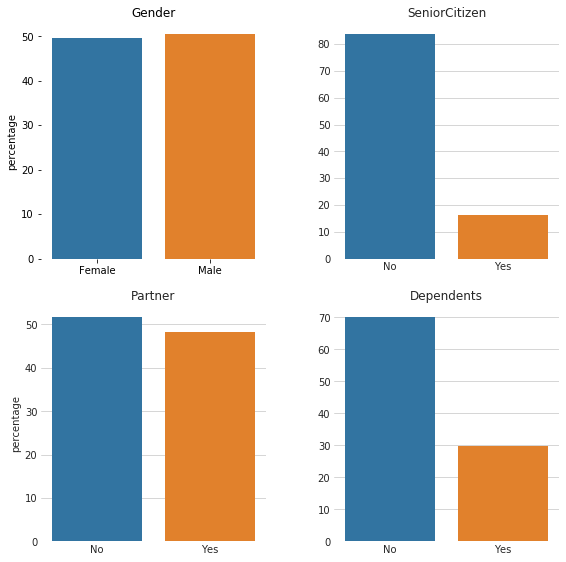

In [50]:
cols = ["Gender", "SeniorCitizen", "Partner", "Dependents"]
# Let's create a list to which we'll add a list of labels for each column
map_cols = [] # map_cols is a list of lists
for col in cols:
    map_cols.append(vars()[col])
create_pc_barplot(df_enc, cols, map_cols, (9,9), 2, 2, 4)

We can now clearly see that the proportion of male customers is equal to that of females customers. Around 17% of the customers are Senior Citizens whereas around 30% of the customers have Dependents.

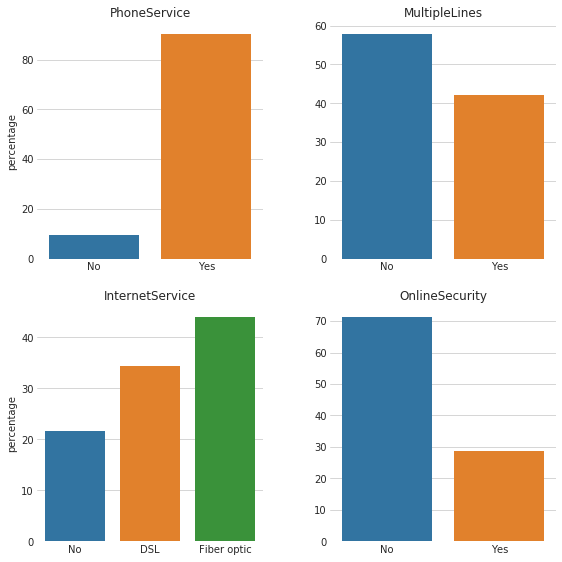

In [51]:
cols = ["PhoneService", "MultipleLines", "InternetService", \
        "OnlineSecurity"]
map_cols = []
for col in cols:
    map_cols.append(vars()[col])
create_pc_barplot(df_enc, cols, map_cols, (9,9), 2, 2, 4)

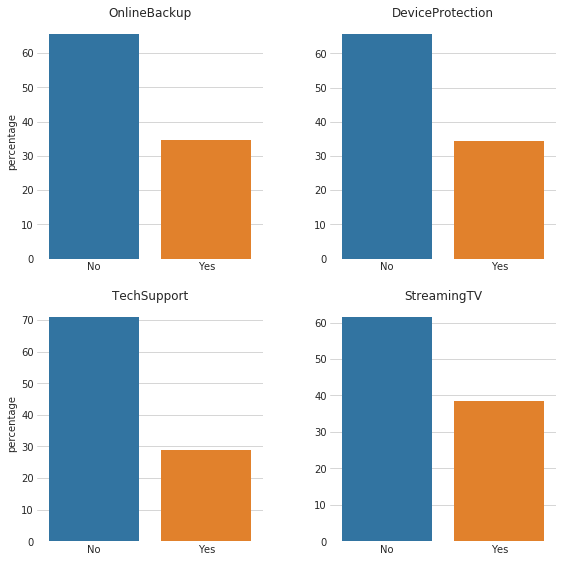

In [52]:
cols = ["OnlineBackup", "DeviceProtection", "TechSupport", \
        "StreamingTV"]
map_cols = []
for col in cols:
    map_cols.append(vars()[col])
create_pc_barplot(df_enc, cols, map_cols, (9,9), 2, 2, 4)

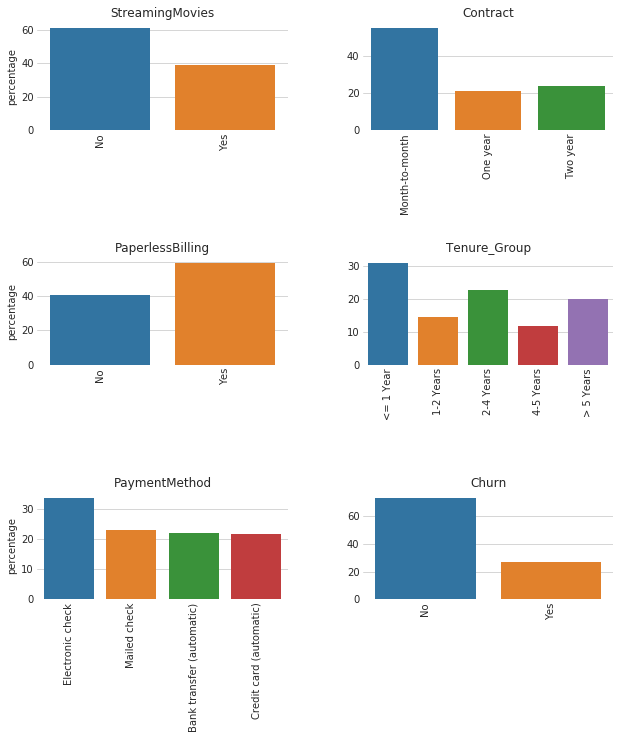

In [53]:
cols = ["StreamingMovies", "Contract", "PaperlessBilling", \
        "Tenure_Group", "PaymentMethod", "Churn"]
map_cols = []
for col in cols:
    map_cols.append(vars()[col])
create_pc_barplot(df_enc, cols, map_cols, (10,10), 3, 2, 6, 90, 1.2, 0.3)

All of the categorical variables seem to have a fairly balanced distribution, therefore, all of them will be kept for the further analysis.

# Machine Learning

Now it's time to learn concept descriptions from our dataset so that we may be able to distinguish examples of one class (Churn = "No") from those of another (Churn = "Yes"). Once we've learnt from our historical data, we should be able to predict whether a new (previously unseen) customer will Churn or not.

## Logistic Regression

### <font color='brown'>Creating Dummy Variables</font>

In [54]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Tenure_Group,Churn
0,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,<= 1 Year,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,2-4 Years,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,<= 1 Year,Yes
3,Male,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,2-4 Years,No
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,<= 1 Year,Yes


In [55]:
cols = ["Gender", "SeniorCitizen", "Partner", "Dependents", \
        "PhoneService", "MultipleLines", "InternetService", \
        "OnlineSecurity", "OnlineBackup", "DeviceProtection", \
        "TechSupport", "StreamingTV", "StreamingMovies", "Contract", \
        "PaperlessBilling", "PaymentMethod", "Tenure_Group"]
df_dummy = pd.get_dummies(df, columns=cols, drop_first=True)

In [56]:
df_dummy.head()

,MonthlyCharges,Churn,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_2-4 Years,Tenure_Group_4-5 Years,Tenure_Group_<= 1 Year,Tenure_Group_> 5 Years
0,29.85,No,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,56.95,No,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,53.85,Yes,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,42.30,No,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,70.70,Yes,0,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0


### <font color='brown'>Checking Independence between Predictors</font>

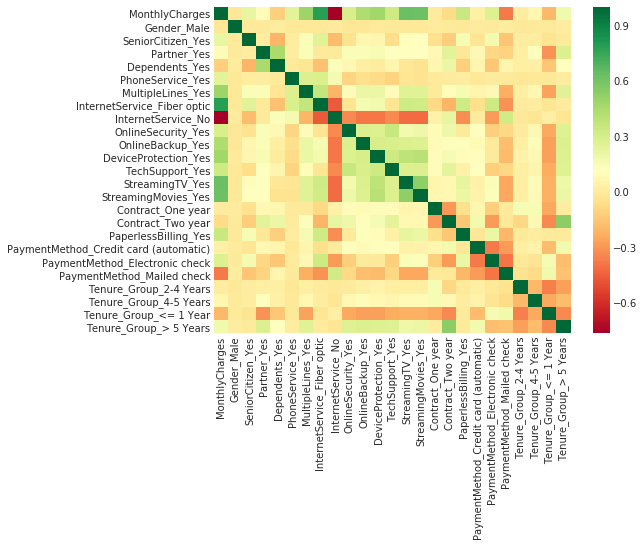

In [57]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_dummy.corr(), cmap='RdYlGn')

The diagonal in the middle shows that each categorical predictor is only strongly dependent on itself and is almost independent of the other categorical predictors. So everything looks good.

### <font color='brown'>Separating the Predictors from Response</font>

We'll have to create two dataframes now, one containing all the predictors and the other containing only the response. This is necessary before we can proceed with the learning phase. The custom of choosing a capital letter for the predictors dataframe and a small case letter for the response dataframe will be maintained.

In [58]:
X = df_dummy.drop("Churn", axis=1)
y = df_dummy["Churn"]
print("X shape: {}".format(X.shape), "\ny shape: {}".format(y.shape))

X shape: (7032, 25) 
y shape: (7032,)


### <font color='brown'>Splitting the Data randomly into a Training and Test Set</font>

Let's split our dataset into a randomly selected training set which includes 70% of rows in our dataset and a test set which includes the remaining 30%.

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [61]:
print("X_train shape: {}".format(X_train.shape), ", X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape), ",    y_test shape: {}".format(y_test.shape))

X_train shape: (4922, 25) , X_test shape: (2110, 25)
y_train shape: (4922,) ,    y_test shape: (2110,)


### <font color='brown'>1- The Initial Logistic Regression Model</font>

In [62]:
from sklearn.linear_model import LogisticRegression
LRModel = LogisticRegression()

#### <font color='brown'>1.1- Model Fitting and Evaluation using single Test set</font>

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
LRModel.fit(X_train, y_train)
predictions = LRModel.predict(X_test)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1433  122]
 [ 298  257]]


             precision    recall  f1-score   support

         No       0.83      0.92      0.87      1555
        Yes       0.68      0.46      0.55       555

avg / total       0.79      0.80      0.79      2110



#### <font color='brown'>1.2- Model Fitting and Evaluation using Cross-validation</font>

Cross-validation is a statistical method of evaluating generalization performance that is more stable and thorough than using a single split into a training and testing set. In cross-validation, the data is instead split repeatedly and multiple models are trained. The most commonly used version of cross-validation is 10-fold cross-validation. The function cross_val_score() takes care of splitting the data, so we only need to provide it with the dataframes X and y.

In [65]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LRModel, X, y, cv=10)
print("Cross-validation scores on individual folds:\n{}".format(list(scores.round(6))))
print("\nCross-validation mean score: {}".format(scores.mean().round(6)))

Cross-validation scores on individual folds:
[0.792614, 0.8125, 0.795455, 0.813656, 0.783784, 0.783784, 0.812233, 0.807966, 0.798009, 0.807692]

Cross-validation mean score: 0.800769


### <font color='brown'>2- Improving the Model using Feature Selection</font>

Now let's try to select the most relevant and predictive features while dropping those that are less relevant and therefore either don't help in improving accuracy or deteriorate the accuracy by adding noise to the data. We'll try to select features that help us improve upon the accuracy of the base model above.

#### <font color='brown'>2.1- Recursive Feature Elimination (RFE)</font>

Recursive Feature Elimination (RFE) is an iterative feature selection method, which builds a series of models with varying numbers of features. RFE starts with all features, builds a model, and discards the least important feature according to the model. Then a new model is built using all but the discarded feature, and so on until only a prespecified number of features are left. Although it's impossible to come up with the right number of predictors using random guessing, let's say we instruct the RFE model to select the best 15 features.

[False False False False False  True  True  True  True  True False False
  True False  True  True  True  True False  True False  True  True  True
  True]


([], <a list of 0 Text yticklabel objects>)

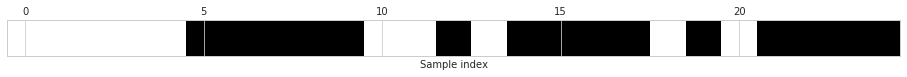

In [66]:
from sklearn.feature_selection import RFE

select = RFE(LRModel, n_features_to_select=15)
select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks([])

In [67]:
X_train_rfe, X_test_rfe = X_train.loc[:,mask], X_test.loc[:,mask]

In [68]:
print("X_train_rfe shape: {}".format(X_train_rfe.shape), ", X_test_rfe shape: {}".format(X_test_rfe.shape))

X_train_rfe shape: (4922, 15) , X_test_rfe shape: (2110, 15)


#### <font color='brown'>2.2- Model Fitting and Evaluation using Cross-validation</font>

In [69]:
X_rfe = X.loc[:,mask]
scores = cross_val_score(LRModel, X_rfe, y, cv=10)
print("Cross-validation scores on individual folds:\n{}".format(list(scores.round(6))))
print("\nCross-validation mean score: {}".format(scores.mean().round(6)))

Cross-validation scores on individual folds:
[0.803977, 0.809659, 0.789773, 0.809388, 0.783784, 0.783784, 0.816501, 0.800853, 0.802276, 0.801994]

Cross-validation mean score: 0.800199


#### <font color='brown'>2.3- RFE in combination with Cross-validation for Feature Ranking (RFECV)</font>

Instead of guessing at the right number of features to select, we can use the function RFECV which performs RFE in a cross-validation loop to find the optimal number of features automatically.

In [70]:
def RFECV_select_features(model):
    from sklearn.feature_selection import RFECV
    # Create the RFE object and compute a cross-validated score.
    # The "accuracy" scoring is proportional to the number of correct classifications
    select = RFECV(estimator=model, step=1, cv=10, scoring='accuracy')
    select.fit(X, y)

    # visualize the selected features:
    global mask
    mask = select.get_support()
    print(mask)
    plt.matshow(mask.reshape(1, -1), cmap='gray_r')
    plt.xlabel("Sample index")
    plt.yticks([])
    plt.show()

    # visualize # of features selected vs cross-validation accuracy:
    print("Legend: \"black\" = features selected, \"white\" = not selected\n")
    print("Optimal number of features: {:d}" .format(select.n_features_))
    print("\nNumber of features selected and corresponding accuracy is shown below and depicted in the plot:\n")
    f_score_dict = {}
    for f in range(0, len(select.grid_scores_)):
        f_score_dict[f+1] = select.grid_scores_[f].round(4)
    print(f_score_dict)

    # Plot number of features VS. cross-validation scores
    plt.figure(figsize=(10,6))
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation accuracy")
    plt.plot(range(1, len(select.grid_scores_) + 1), select.grid_scores_)
    plt.show()

In [71]:
type(mask)

numpy.ndarray

[False False  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True False  True  True  True
  True]


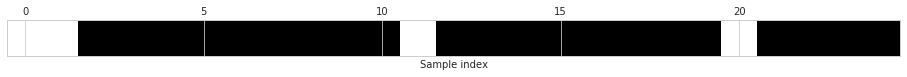

Legend: "black" = features selected, "white" = not selected

Optimal number of features: 21

Number of features selected and corresponding accuracy is shown below and depicted in the plot:

{1: 0.7342, 2: 0.7342, 3: 0.7621, 4: 0.7868, 5: 0.7868, 6: 0.7861, 7: 0.7911, 8: 0.7917, 9: 0.7945, 10: 0.7954, 11: 0.7956, 12: 0.7941, 13: 0.7929, 14: 0.7949, 15: 0.7976, 16: 0.7976, 17: 0.7986, 18: 0.8001, 19: 0.8003, 20: 0.7999, 21: 0.8013, 22: 0.8008, 23: 0.8009, 24: 0.8011, 25: 0.8008}


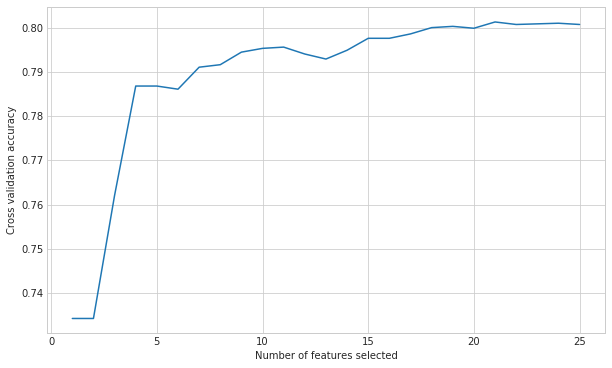

In [72]:
RFECV_select_features(LRModel)

#### <font color='brown'>2.4- Model Fitting and Evaluation using Cross-validation</font>

In [73]:
X_rfecv = X.loc[:,mask]
scores = cross_val_score(LRModel, X_rfecv, y, cv=10)
print("Cross-validation scores on individual folds:\n{}".format(list(scores.round(6))))
print("\nCross-validation mean score: {:.6f}".format(scores.mean()))

Cross-validation scores on individual folds:
[0.792614, 0.8125, 0.795455, 0.813656, 0.783784, 0.782361, 0.812233, 0.805121, 0.796586, 0.809117]

Cross-validation mean score: 0.800343


## Decision Tree

### <font color='brown'>Separating the Predictors from Response</font>

We'll now create the predictor and response dataframes once again using the original encoded dataframe as there is no need to create dummy variables in a decision tree.

In [74]:
X = df_enc.drop("Churn", axis=1)
y = df_enc["Churn"]
print("X shape: {}".format(X.shape), "\ny shape: {}".format(y.shape))

X shape: (7032, 18) 
y shape: (7032,)


### <font color='brown'>Splitting the Data randomly into a Training and Test Set</font>

Let's split our dataset into a randomly selected training set which includes 70% of rows in our dataset and a test set which includes the remaining 30%.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [76]:
print("X_train shape: {}".format(X_train.shape), ", X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape), ",    y_test shape: {}".format(y_test.shape))

X_train shape: (4922, 18) , X_test shape: (2110, 18)
y_train shape: (4922,) ,    y_test shape: (2110,)


### <font color='brown'>1- The Initial Decision Tree Model</font>

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

#### <font color='brown'>1.1- Model Fitting and Evaluation using single Test set</font>

In [78]:
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1246  300]
 [ 291  273]]


             precision    recall  f1-score   support

          0       0.81      0.81      0.81      1546
          1       0.48      0.48      0.48       564

avg / total       0.72      0.72      0.72      2110



#### <font color='brown'>1.2- Model Fitting and Evaluation using Cross-validation</font>

In [79]:
scores = cross_val_score(dtree, X, y, cv=10)
print("Cross-validation scores on individual folds:\n{}".format(list(scores.round(6))))
print("\nCross-validation mean score: {}".format(scores.mean().round(6)))

Cross-validation scores on individual folds:
[0.721591, 0.745739, 0.731534, 0.739687, 0.716927, 0.687055, 0.711238, 0.714083, 0.722617, 0.736467]

Cross-validation mean score: 0.722694


### <font color='brown'>2- Improving the Model using Feature Selection</font>

#### <font color='brown'>2.1- RFECV</font>

[False False False False False False  True False False False False False
 False  True False  True  True  True]


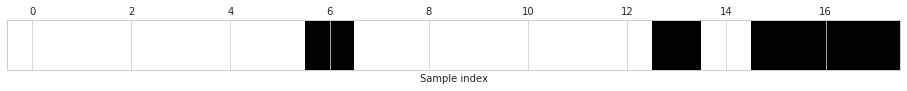

Legend: "black" = features selected, "white" = not selected

Optimal number of features: 5

Number of features selected and corresponding accuracy is shown below and depicted in the plot:

{1: 0.697, 2: 0.7183, 3: 0.7196, 4: 0.726, 5: 0.7312, 6: 0.7217, 7: 0.7184, 8: 0.7223, 9: 0.718, 10: 0.7201, 11: 0.7123, 12: 0.7187, 13: 0.7215, 14: 0.7179, 15: 0.7159, 16: 0.7197, 17: 0.7233, 18: 0.722}


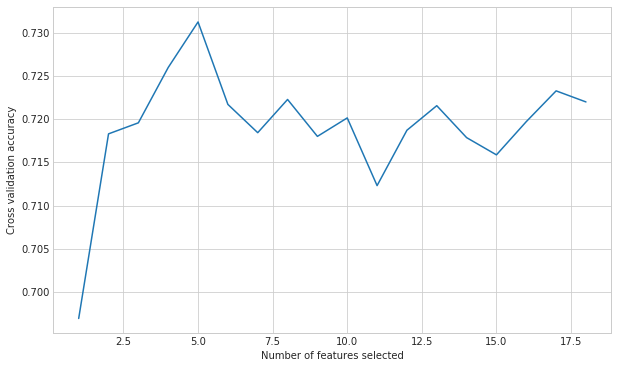

In [80]:
RFECV_select_features(dtree)

#### <font color='brown'>2.2- Model Fitting and Evaluation using Cross-validation</font>

In [81]:
X_rfecv = X.loc[:,mask]
scores = cross_val_score(dtree, X_rfecv, y, cv=10)
print("Cross-validation scores on individual folds:\n{}".format(list(scores.round(6))))
print("\nCross-validation mean score: {:.6f}".format(scores.mean()))

Cross-validation scores on individual folds:
[0.738636, 0.737216, 0.734375, 0.704125, 0.72404, 0.705548, 0.731152, 0.708393, 0.763869, 0.749288]

Cross-validation mean score: 0.729664


## Random Forest

### <font color='brown'>1- The Initial Random Forest Model</font>

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=42)

#### <font color='brown'>1.1- Model Fitting and Evaluation using single Test set</font>

In [83]:
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1376  170]
 [ 300  264]]


             precision    recall  f1-score   support

          0       0.82      0.89      0.85      1546
          1       0.61      0.47      0.53       564

avg / total       0.76      0.78      0.77      2110



#### <font color='brown'>1.2- Model Fitting and Evaluation using Cross-validation</font>

In [84]:
scores = cross_val_score(rfc, X, y, cv=10)
print("Cross-validation scores on individual folds:\n{}".format(list(scores.round(6))))
print("\nCross-validation mean score: {}".format(scores.mean().round(6)))

Cross-validation scores on individual folds:
[0.778409, 0.795455, 0.791193, 0.773826, 0.759602, 0.719772, 0.762447, 0.783784, 0.782361, 0.790598]

Cross-validation mean score: 0.773745


### <font color='brown'>2- Improving the Model using Feature Selection</font>

#### <font color='brown'>2.1- RFECV</font>

[ True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True]


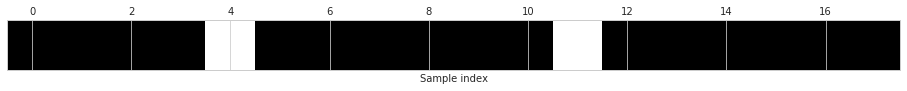

Legend: "black" = features selected, "white" = not selected

Optimal number of features: 16

Number of features selected and corresponding accuracy is shown below and depicted in the plot:

{1: 0.6833, 2: 0.7137, 3: 0.7381, 4: 0.7452, 5: 0.7425, 6: 0.7476, 7: 0.7504, 8: 0.7541, 9: 0.7582, 10: 0.7568, 11: 0.7622, 12: 0.7661, 13: 0.7686, 14: 0.772, 15: 0.7715, 16: 0.7739, 17: 0.7723, 18: 0.7737}


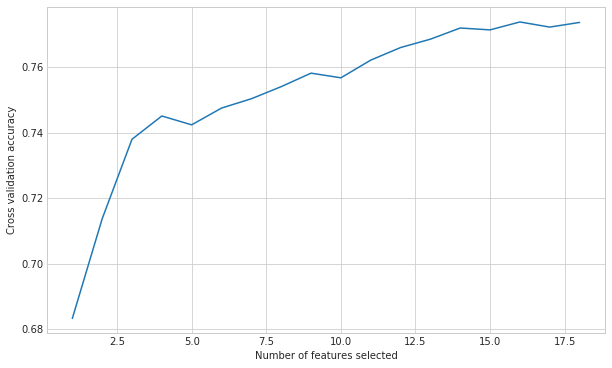

In [85]:
RFECV_select_features(rfc)

#### <font color='brown'>2.2- Model Fitting and Evaluation using Cross-validation</font>

In [86]:
X_rfecv = X.loc[:,mask]
scores = cross_val_score(rfc, X_rfecv, y, cv=10)
print("Cross-validation scores on individual folds:\n{}".format(list(scores.round(6))))
print("\nCross-validation mean score: {:.6f}".format(scores.mean()))

Cross-validation scores on individual folds:
[0.78267, 0.798295, 0.785511, 0.770982, 0.749644, 0.722617, 0.772404, 0.786629, 0.772404, 0.790598]

Cross-validation mean score: 0.773176


## Support Vector Machine (SVM)

### <font color='brown'>1- The Initial SVM Model</font>

In [88]:
from sklearn import svm
svmc = svm.SVC()

#### <font color='brown'>1.1- Model Fitting and Evaluation using single Test set</font>

In [89]:
svmc.fit(X_train, y_train)
predictions = svmc.predict(X_test)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1405  141]
 [ 298  266]]


             precision    recall  f1-score   support

          0       0.83      0.91      0.86      1546
          1       0.65      0.47      0.55       564

avg / total       0.78      0.79      0.78      2110



#### <font color='brown'>1.2- Model Fitting and Evaluation using Cross-validation</font>

In [90]:
scores = cross_val_score(svmc, X, y, cv=10)
print("Cross-validation scores on individual folds:\n{}".format(list(scores.round(6))))
print("\nCross-validation mean score: {}".format(scores.mean().round(6)))

Cross-validation scores on individual folds:
[0.801136, 0.805398, 0.795455, 0.813656, 0.778094, 0.765292, 0.810811, 0.799431, 0.792319, 0.803419]

Cross-validation mean score: 0.796501


## <font color='brown'>Summary</font>

From the above example, we can see that Logistic Regression and Random Forest performed better than Decision Tree for customer churn analysis for this particular dataset.

Throughout the analysis, I have learned several important things:
1. Features such as tenure_group, Contract, PaperlessBilling, MonthlyCharges and InternetService appear to play a role in customer churn.
2. There does not seem to be a relationship between gender and churn.
3. Customers in a month-to-month contract, with PaperlessBilling and are within 12 months tenure, are more likely to churn; On the other hand, customers with one or two year contract, with longer than 12 months tenure, that are not using PaperlessBilling, are less likely to churn.

Source code that created this post can be found here. I would be pleased to receive feedback or questions on any of the above.